In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2 as cv
import os

from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs import WCS
from astropy.table import Table

In [2]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'
fits_folder = 'E:/cosmos-fits'
cosmos_folder = 'E:/cosmos-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'

In [3]:
df_cat = pd.read_csv(f'{combine_fold}/dor-all-restaged-full.csv', index_col = 0).iloc[:3500]

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
stage_1_id = df_cat.query('category == "stage1"').sample(1)['ORyanID_23'].iloc[0]
stage_1_id

4001241390492

In [32]:
stage_2_id = df_cat.query('category == "stage2"').sample(1)['ORyanID_23'].iloc[0]
stage_2_id

4001143784129

In [33]:
stage_3_id = df_cat.query('category == "stage3"').sample(1)['ORyanID_23'].iloc[0]
stage_3_id

'4001182845035'

In [34]:
stage_4_id = df_cat.query('category == "stage4"').sample(1)['ORyanID_23'].iloc[0]
stage_4_id

4000853484151

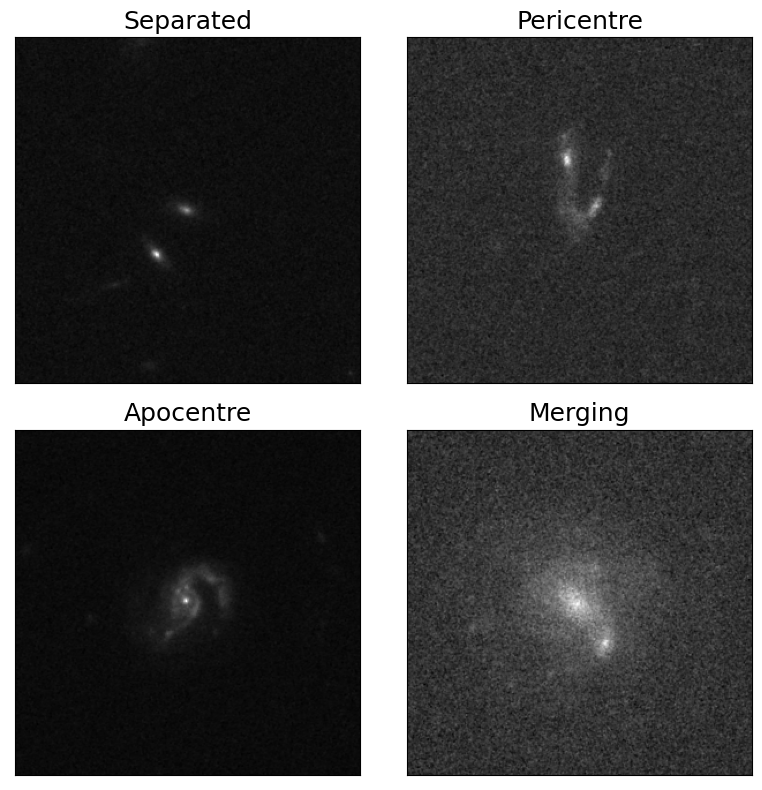

In [35]:
counter = 0
stage_list = [4001081421567, 4001143784129, 6000536185717, 4000853484151]
stage_names = ['Separated', 'Pericentre', 'Apocentre', 'Merging']
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8))
for i in range(2):
    for j in range(2):
        
        filename = f'{fits_folder}/{stage_list[counter]}.fits'
        
        with fits.open(filename) as hdul:
            im = hdul[0].data
        
        axes[i,j].imshow(im[350:650,350:650], origin = 'lower', cmap='gray')
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        axes[i,j].set_title(f'{stage_names[counter]}', fontsize = 18)
        
        counter += 1

fig.tight_layout()
plt.savefig(f'{fig_folder}/examples-stages.pdf', bbox_inches = 'tight')
plt.show()